In [ ]:
import numpy as np 

num_input = 2
num_output = 1 
num_sample = 4

# training sample
X = np.array([0, 0, 1, 1, 0, 1, 0, 1]).reshape(num_input, num_sample)
Ot = np.array([0, 1, 1, 0]).reshape(num_output, num_sample)

print(X)
print(Ot)

[[0 0 1 1]
 [0 1 0 1]]
[[0 1 1 0]]


In [ ]:
# weight parameter initialization
def init_params(num_input = 2, num_hidden = 2):
  W1 = np.random.rand(num_hidden, num_input)
  B1 = np.random.rand(num_hidden, 1)
  W2 = np.random.rand(num_output, num_hidden)
  B2 = np.random.rand(num_output, 1)
  return W1, B1, W2, B2

# initialize with zero >> Weights learn same features every iteration >> poor learning
# def init_params(num_input = 2, num_hidden = 2):
#   W1 = np.zeros((num_hidden, num_input))
#   B1 = np.zeros((num_hidden, 1))
#   W2 = np.zeros((num_output, num_hidden))
#   B2 = np.zeros((num_output, 1))
#   return W1, B1, W2, B2

W1, B1, W2, B2 = init_params()
print(W1)
print(B1)
print(W2)
print(B2)

[[0.28676208 0.81261066]
 [0.81772389 0.29597532]]
[[0.16786939]
 [0.11545595]]
[[0.60403586 0.73212108]]
[[0.34876651]]


In [ ]:
# weight * input + bias
def wxpb(W, X, B):
  return np.dot(W, X) + B

def sigmoid (x):
  return 1./(1+ np.exp(-1*x))

# first layer
Z1 = wxpb(W1, X, B1)
Y = sigmoid(Z1)
print(Y)

[[0.54186907 0.72720346 0.61173984 0.78027028]
 [0.52883197 0.60143102 0.71771996 0.77367067]]


In [ ]:
# second layer
Z2 = wxpb(W2, Y, B2)
O = sigmoid(Z2)
print(O)

[[0.74330997 0.77352857 0.77621386 0.80003264]]


In [ ]:
# loss function
def loss_func(O, Ot):
  return 1./num_sample * np.sum(-1*(Ot*np.log(O) + (1-Ot)*np.log(1-O)))

loss = loss_func(O, Ot)
print(loss)

0.8699017513465476


In [ ]:
# forward propagation
def forward(W1, B1, W2, B2):
  Z1 = wxpb(W1, X, B1)
  Y = sigmoid(Z1)

  Z2 = wxpb(W2, Y, B2)
  O = sigmoid(Z2)

  loss = loss_func(O, Ot)
  return Z1, Y, Z2, O, loss

def backprop(W1, B1, W2, B2, Z1, Y, Z2, O, Ot):

  dZ2 = np.multiply((O-Ot), 1)
  dW2 = np.dot(dZ2, Y.T)
  dB2 = 1./4. * np.sum(dZ2, axis = 1, keepdims = True)
  dY = np.dot(W2.T, dZ2)

  dZ1 = np.multiply(dY, Y*(1-Y))
  dW1 = np.dot(dZ1, X.T)
  dB1 = 1./4.*np.sum(dZ1, axis = 1, keepdims = True)

  return dW1, dB1, dW2, dB2

def train(W1, B1, W2, B2, lr = 0.1, iteration = 1000):
  loss_trace = []
  for iter in range(iteration):
    Z1, Y, Z2, O, loss = forward(W1, B1, W2, B2)
    dW1, dB1, dW2, dB2 = backprop(W1, B1, W2, B2, Z1, Y, Z2, O, Ot)

    W1 = W1 - lr * dW1
    B1 = B1 - lr * dB1 
    W2 = W2 - lr * dW2
    B2 = B2 - lr * dB2 

    loss_trace.append(loss)

  return W1, B1, W2, B2, loss_trace, loss, O


In [ ]:
# initialize
W1, B1, W2, B2 = init_params()

# train
W1, B1, W2, B2, loss_trace, loss, O = train(W1, B1, W2, B2, 0.1, 4000)

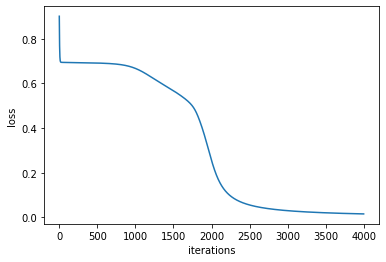

[[0.01384689 0.97212683 0.9882147  0.00812316]]
0.015556071388341306


In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_trace)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()
print(O)
print(loss)

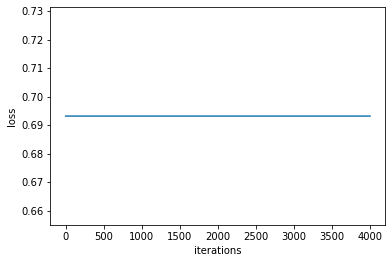

[[0.5 0.5 0.5 0.5]]
0.6931471805599453


In [ ]:
# lr = 0.1, weight, bias zero vector
# proof that NN is useless with initial weight set to zero

plt.plot(loss_trace)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()
print(O)
print(loss)

XOR 연산 만족시키는 output : [0, 1, 1, 0]에 가까워야 한다